# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

### FAURE Guillaume, 21108390
### LUCAS Garance, 21200408

# TME 10- LIME / SHAP

<div class="alert alert-block alert-warning">
L'objet de ce TME est de tester les algorithmes LIME et SHAP sur des tâches de classification assez simple.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
Utiliser le dataset <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a>, comme dans le TME 3 et apprendre dessus un modèle linéaire de régression logistique
</div>

In [2]:
data = load_breast_cancer()
target_names = data.target_names
X = data.data
y = data.target
feature_names = data.feature_names
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = logreg.score(X_test, y_test)
print(acc)
print(target_names)
print(logreg.coef_)


(569, 30)
(569,)
0.951048951048951
['malignant' 'benign']
[[ 0.65072949  0.16065579 -0.1432217   0.02128928 -0.14523088 -0.16966886
  -0.34652272 -0.20813853 -0.29451841 -0.02629815 -0.02861692  0.99600386
  -0.0180698  -0.1078769  -0.01269834  0.06623361 -0.00550566 -0.02258377
  -0.03086352  0.01582645  0.27462834 -0.38655711 -0.22574996 -0.01026533
  -0.25534755 -0.57732204 -1.12312923 -0.44439845 -0.64125853 -0.08187932]]


## 2- Explication avec SHAP

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par SHAP.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Exécuter le bloc ci-dessous pour obtenir les explications globales de SHAP. Commentez.
</div>

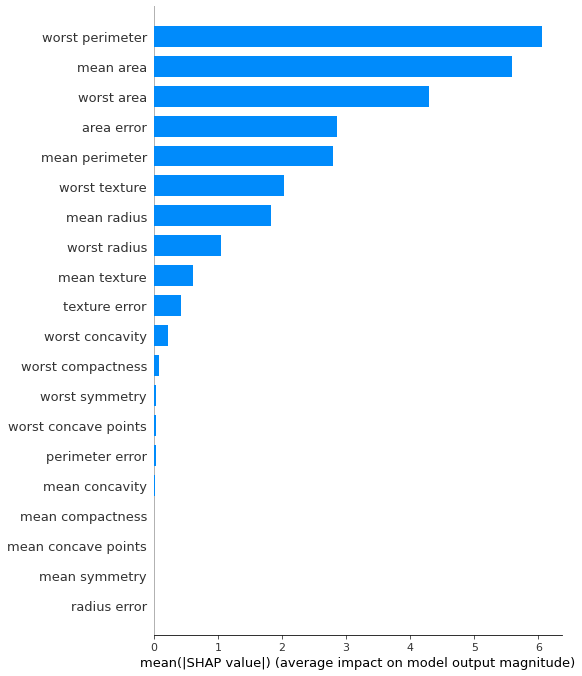

[-2.14472839e-01  1.33973451e-02  3.26601066e-01 -5.83170678e-01
  2.72643865e-04  9.02562176e-04  2.91516002e-03  8.70071308e-04
  2.87954564e-04 -7.40988168e-06  2.77037365e-04 -3.15039503e-03
  2.19914374e-04  4.47965485e-01 -6.29933401e-06 -3.13701024e-05
  8.62678313e-06  2.27377777e-06  1.18437762e-05  2.19272903e-06
 -1.24088704e-01  1.20209259e-01  7.28132037e-01  6.01332185e-01
  8.44717030e-04  1.37304566e-02  1.80614834e-02  4.03643154e-03
  5.31510049e-03  1.41498911e-05]
-3.2685819219123786
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'wo

In [3]:
import shap

explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)
print(np.mean(shap_values, axis=0))
print(shap_values[0].sum())
print(feature_names)

Commentaire : 

Dans un premier temps on remarque qu'on a pris la moyenne des valeurs absolues des valeurs de shap, ainsi on peut rendre compte de l'importance de l'impact de l'attribute sur la prediction moyenne du modele mais pas de la facon/du sens de l'impact.

On remarque que les 3 attributs qui ont le plus d'impact sur la prediction sont : worst perimeter, mean area and worst area 

<div class = "alert alert-block alert-info">
    Q2.2 - Exécuter le bloc ci-dessous pour obtenir une explication locale avec SHAP du premier exemple de la base de test. Commentez.
</div>

In [4]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test[0, :],
    feature_names=feature_names,
)


Commentaire : 

The force plot is another way to see the effect each feature has on the prediction, for a given observation.

- Base value: This is the average prediction over the dataset, which serves as a reference point for comparing individual predictions.
- Output value (f(x)): This is the actual prediction for the observation in question. The value on the far right indicates the prediction made by the model for the input data.

- Features pushing higher or lower: The features that push the prediction higher (to the right) are shown in red, and those that push the prediction lower (to the left) are shown in blue. Each feature has a SHAP value associated with it, which indicates how much it contributes to pushing the prediction from the base value to the output value.

- Length of the feature bar: This represents the magnitude of the feature's impact. A longer bar means the feature has a more significant impact on the model's prediction.

- Direction of the feature impact: If the bar is red and points to the right, it means the feature is contributing to an increase in the prediction value. If the bar is blue and points to the left, it means the feature is contributing to a decrease in the prediction value.

- Feature values: Text labels on the bars provide the actual values for these features for the observation being explained. For example, "mean area = 556.7" means that for this particular observation, the mean area feature has a value of 556.7, and it's pushing the prediction lower.


y = 0 => malin
y = 1 => benin

la valeur de f(x) correspond au log odd de p => ln(p/(1-p))

Le signe de f(x) permet d'indiquer que risque d'avoir une tumeur maligne ou non.  Si f(x) est négatif alors le risque est plus important, si f(x) est positif, le risque est moins important.

<div class = "alert alert-block alert-info">
    Q2.3 - Comparer avec l'exemple suivant de la base de test.
</div>

In [5]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[1, :],
    X_test[1, :],
    feature_names=feature_names,
)

Commentaires:
On remarque que : 

- La valeur prédite est très différente de l'exemple 0 => 3.41 vs -5.29 
- Plus d'attributs tire la prédiction vers des valeurs positives alors que pour l'exemple précédents, plus d'attributs tiraient vers des valeurs négatives.
- Certains attributs comme worst périmeter par exemple ont plus d'importance dans la prediction actuelle d'après shap que pour la prédiction précédente. 
- cet exemple, le patient a une probabilité plus importante d'avoir une tumeur bénigne alors que le patient précédent avait une probabilité plus forte que sa tumeur soit maligne. 

## 3 - Expérimentations

<div class="alert alert-block alert-warning">
    <ul>
        <li> Comparer les résultats fournis par LIME et SHAP sur des données identiques et commenter les résultats</li>
    <li> Examiner les résultats par exemple sur les données half-moons dans un cas où une explication linéaire est inappropriée</li>
    <li> Générer d'autres explications globales avec SHAP</li>
    <li> Modifier votre propre implémentation de LIME pour utiliser le noyau SHAP et comparer au résultat fourni par SHAP (facultatif)</li>
        </ul>
</div>

## 3.1 Comparaison entre lime et shap pour la dernière observation de breast cancer

In [43]:
print(target_names)

['malignant' 'benign']


0
[[1.00000000e+00 1.81111732e-11]]


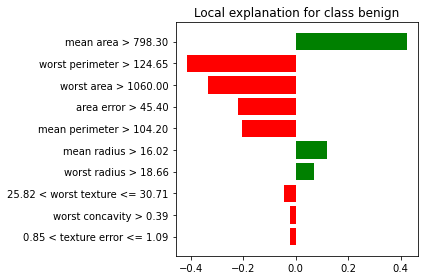

In [41]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')



exp = explainer.explain_instance(X_test[-1], logreg.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.tight_layout()

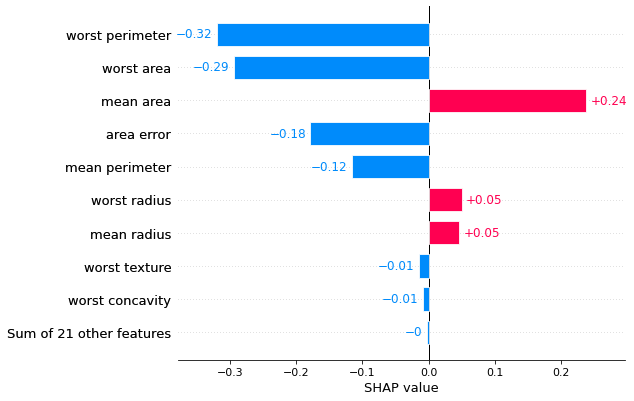

In [46]:
explainer = shap.Explainer(logreg.predict, X_test,feature_names=feature_names)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
shap.plots.bar(shap_values[-1], max_display=10)


In [14]:
explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[-1, :],
    X_test[-1, :],
    feature_names=feature_names,
)


### Explication: 
Nous allons regarder les explications données entre Lime et Shap pour la dernière donnée du dataset sachant que celle ci est prédite maligne (0) et appartient réellement à la classe maligne (0)

Le premier graphique représente les explications avec lime.
On peut voir sur celui ci que les features en faveur d'une décision "benigne" par ordre d'importance sont "mean area", "mean radius", "worst radius". Ceux en faveur de la decision maligne par ordre d'importance sont "worst perimeter", "worst area", "area error" et "mean perimeter". 

Les deux autres graphiques représentent les explications avec shap. Ceux ci sont présenté de différentes façon avec un barplot et un forceplot.
Lorsqu'on analyse le bar plot, on peut le comparer facilement à Lime , cependant il ne faut pas oublier qu'avec shap l'explication se fait par rapport à la valeur moyenne contrairement à lime et cela est plus visible sur le force plot grâce à l'indication de la base value (-2.022) et f(x) (-24.73)
On peut voir sur celui ci que les features en faveur d'une décision "benigne" par ordre d'importance sont "mean area", "mean radius", "worst radius". Ceux en faveur de la decision maligne par ordre d'importance sont "worst perimeter", "worst area", "area error" et "mean perimeter". 
Les features ayant une importances dans le Lime et Shap sont ici les même avec une conservation de l'ordre.  C'est plus l'interpretation que l'on en fait comme dit plus haut qui est difdférente. 



## 3.2 Comparaison de données sur Half moons entre lime et shap sur une donnée au niveau d'une frontère en "U" et en utilisant une random forest

In [88]:
def affichage(X_test, y_test, classifier):
    
    # Plot X
    plt.plot(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1],'bs')
    plt.plot(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], 'gs')

    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    #frontière décision 
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap='gray')

    # commentaires
    plt.legend()

    # plot.
    plt.show()

point X à expliqué avec cordonné : [1, 0.1]
0.9900990099009901


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


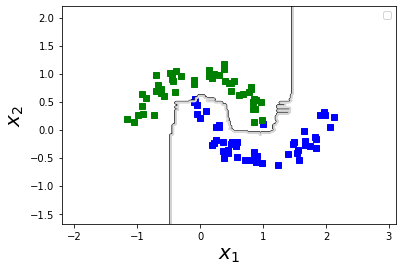

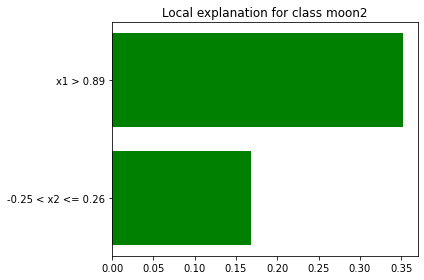

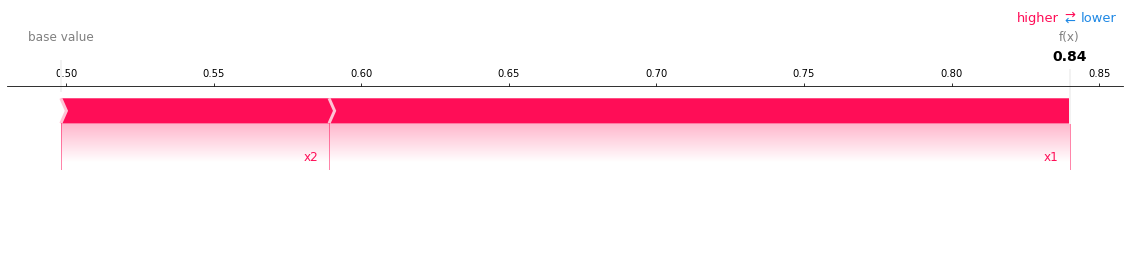

point X à expliqué avec cordonné : [1, 0.2]
0.9900990099009901


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


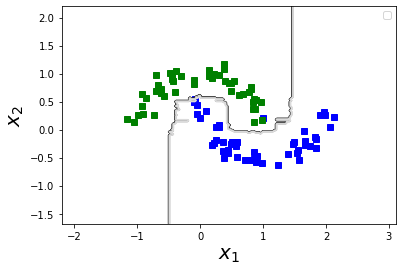

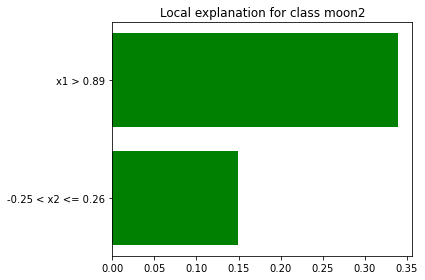

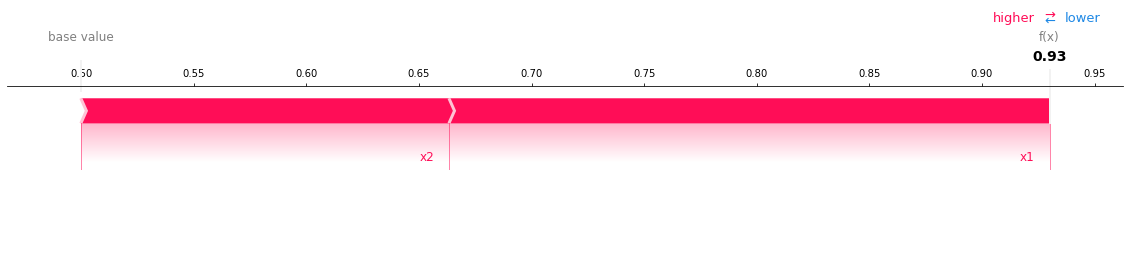

point X à expliqué avec cordonné : [1, 0.30000000000000004]
0.9900990099009901


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


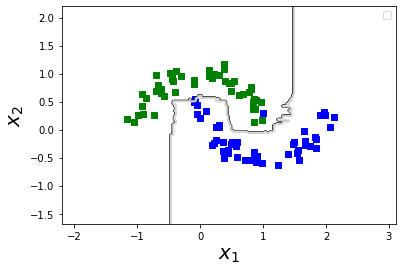

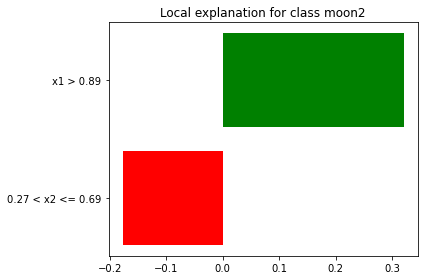

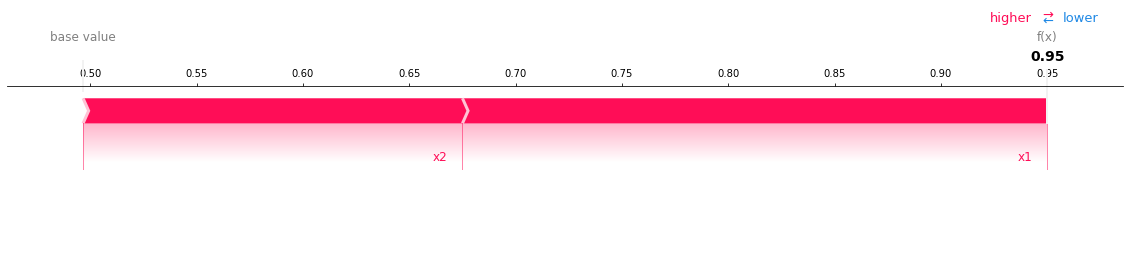

point X à expliqué avec cordonné : [1, 0.4]
0.9900990099009901


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


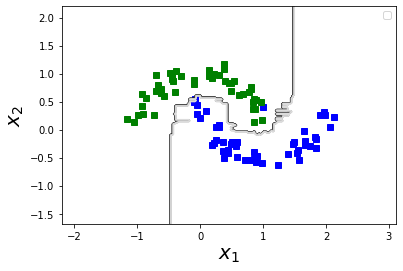

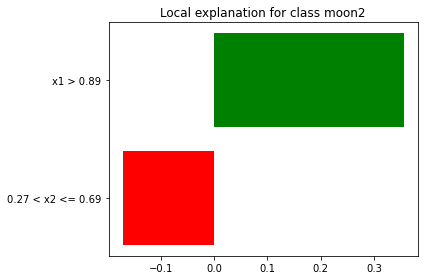

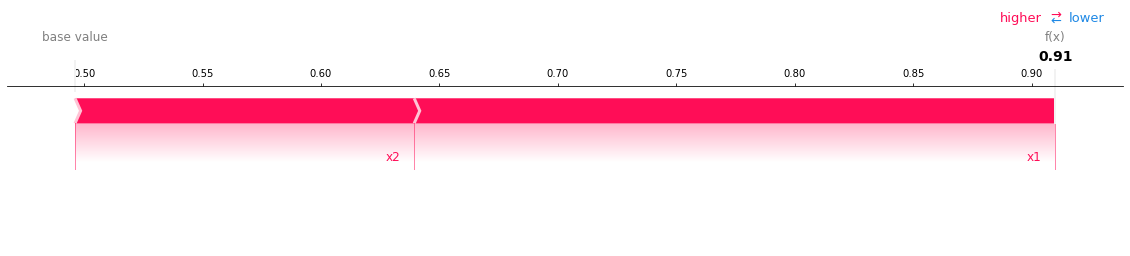

point X à expliqué avec cordonné : [1, 0.5]
0.9900990099009901


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


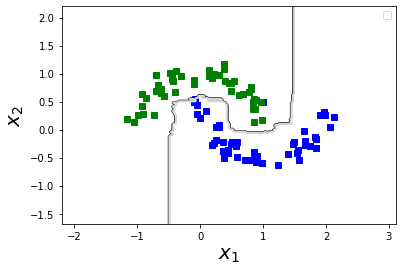

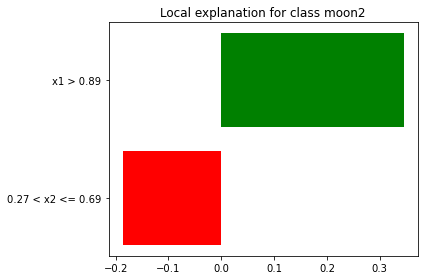

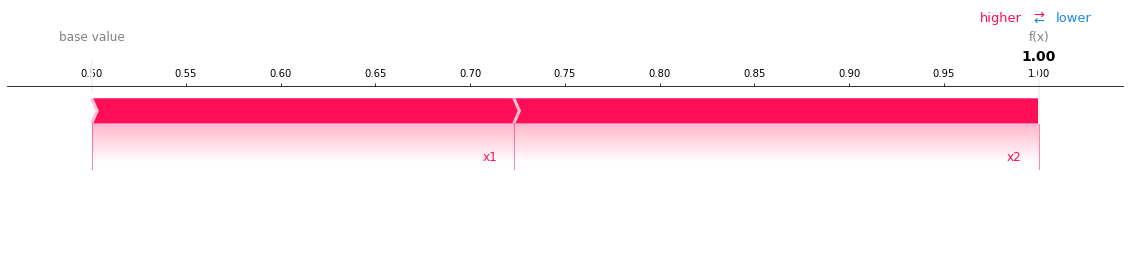

In [94]:

for i in range(5):
    print(f"point X à expliqué avec cordonné : [1, {0.1+0.1*i}]")
    X, y = make_moons(n_samples=400, shuffle=True, noise=0.1, random_state= 9)
    target_names = ["moon1", "moon2"]
    feature_names = ["x1", "x2"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
    X_test = np.vstack((X_test, np.array([1, 0.1+0.1*i])))
    y_test = np.append(y_test, 1)
    model_rfc = RandomForestClassifier()
    model_rfc.fit(X_train, y_train)
    y_pred = model_rfc.predict(X_test)
    acc = model_rfc.score(X_test, y_test)

    print(acc)

    affichage(X_test, y_test, model_rfc)


    explainer = LimeTabularExplainer(X_test,
        feature_names=feature_names,
        class_names=target_names,
        categorical_features=[],
        mode='classification')


    exp = explainer.explain_instance(X_test[-1], model_rfc.predict_proba, num_features=2)
    exp.as_pyplot_figure()
    plt.tight_layout()

    explainer = shap.TreeExplainer(model_rfc,feature_names=["X1","X2"])
    shap_values = explainer.shap_values(X_test[-1])

    #shap.bar_plot(shap_values[:,:], feature_names=feature_names)
    shap.force_plot(
        explainer.expected_value[0], 
        np.array(shap_values[0]),
        matplotlib=True,
        feature_names=feature_names
    ) 


shap.TreeExplainer :
- Conçu pour expliquer les modèles basés sur des arbres de décision, tels que les arbres de décision simples, les forêts aléatoires et les boosters basés sur des arbres (comme XGBoost, LightGBM).
- Exploite la structure hiérarchique des arbres de décision pour calculer les valeurs Shapley de manière efficace.

shap.LinearExplainer :
- Conçu pour expliquer les modèles linéaires, c'est-à-dire les modèles où la relation entre les caractéristiques et la sortie est une combinaison linéaire.
- Utilise une approche basée sur l'inversion de matrices pour calculer les valeurs Shapley dans le contexte de modèles linéaires.
- En résumé, la principale différence réside dans la manière dont ils abordent le calcul des valeurs Shapley en fonction de la structure sous-jacente du modèle. TreeExplainer est adapté aux modèles basés sur des arbres, tandis que LinearExplainer est adapté aux modèles linéaires. Choisir le bon type d'explainer dépend du type de modèle que vous avez.

### Explications : 
Nous avons fait varier très faiblement la coordonée X2 d'un point proche de la frontière de décision dans une zone en "U" afin d'étudier la stabilité de l'explicabilité de lime et shap.
On peut voir que Lime est moins stable que Shap dans sont explicabilité, en effet en faisant varier de facon minime la coordoné y, lime change completement le sens de l'effet (positif puis negatif) de X2 contrairement à shap qui confere à X2 un effet positif sur la décision peu importe la coordonée X2 du point . 
Dans shap cependant on peut voir que plus on s'éloigne de la frontiere plus X2 à une importance positive dans la décision alors que plus on s'en rapproche plus X1 à une importance positive.

Ainsi on peut voir que Shap semble plus resistant et stable pour les explications que lime aux abords d'une frontère de décision qui n'est pas facilement linéairement séparable. Cela est du au fait que lime repose sur une approcimation linéaire de la frontière de décision. 

## 4 - Données textuelles (facultatif)

<div class="alert alert-block alert-warning">
    Apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME et SHAP pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

<div class = "alert alert-block alert-info">
Utilisez LIME et SHAP pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>